In [2]:
import os
from os.path import exists
import pandas as pd
import numpy as np
from statistics import mean
import matplotlib.pyplot as plt
import decimal
plt.style.use('seaborn-whitegrid')

# turn csv string to numbers
def fixFormat(df):
    df = df.drop( df[df['Repeat']=='Repeat'].index )
    
    if 'Repeat' in df.columns:
        df["Repeat"] = df["Repeat"].astype(int)
    if 'Generation' in df.columns:
        df["Generation"] = df["Generation"].astype(int)
    if 'FitnessEvaluateCountReachTarget' in df.columns:
        df["FitnessEvaluateCountReachTarget"] = df["FitnessEvaluateCountReachTarget"].astype(int)
    
    if 'F(x)' in df.columns:
        df["F(x)"] = df["F(x)"].astype(float)
        if wantFitness is False:
            df["F(x)"] = -df["F(x)"]
    
    if df.shape[1] > 3:
        for i in range(df.shape[1]-2):
            df.iloc[:,i+2] = df.iloc[:,i+2].astype(float)
    return df

# get set of crossovers and benchmarks from folder
def getLists(files):
    crossovers = set()
    benchmarks = set()
    for file in files:
        crossovers.add(file.split("+")[0])
        benchmarks.add(file.split("+")[1].split(".")[0])
    return crossovers, benchmarks

#  showPlot(file, df, "Generation", "F(x)")
def showPlot(file, df, x, y):
    print(file)
    plt.plot(df["Generation"], df["F(x)"], 'o', color='black')
    plt.show()

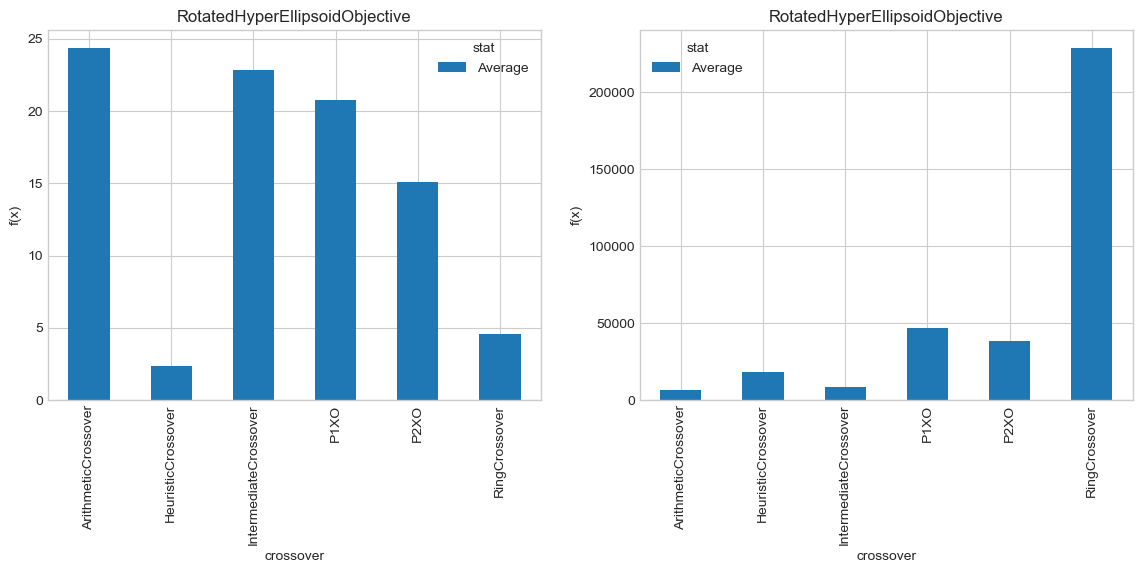

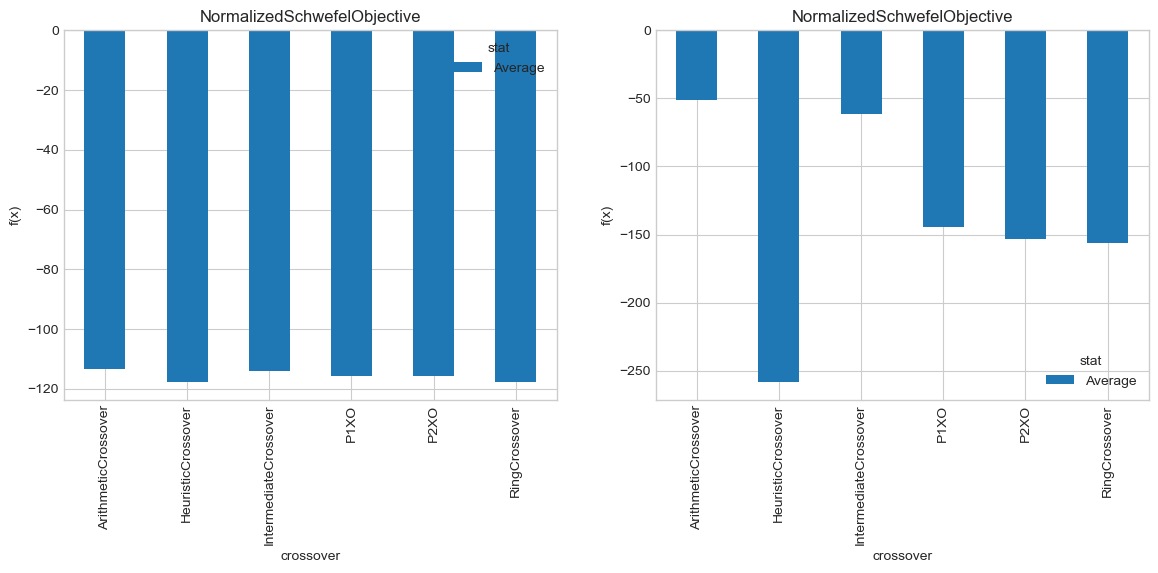

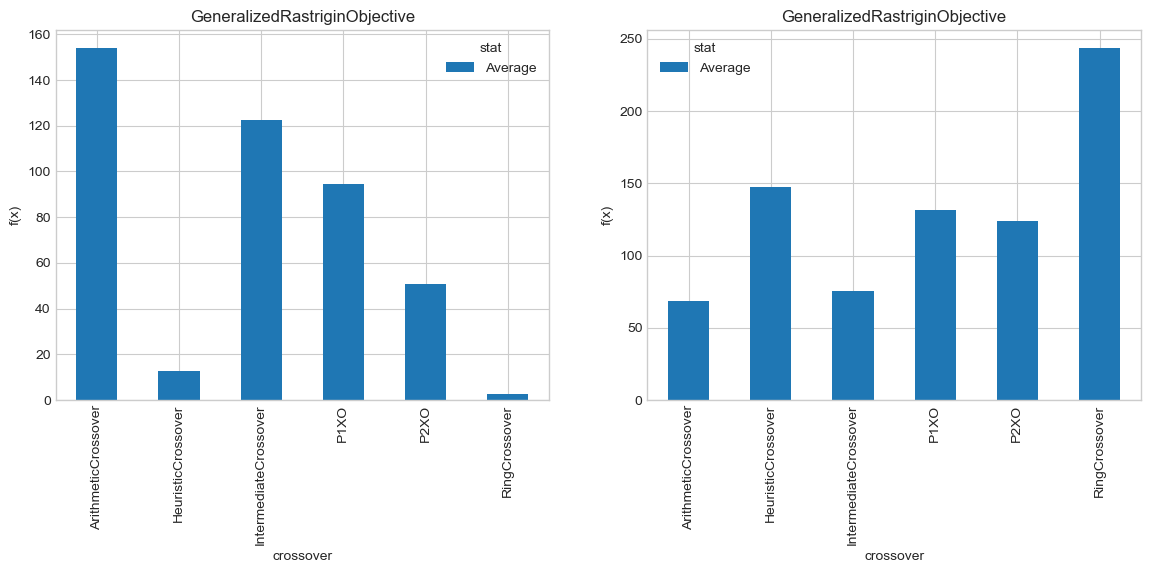

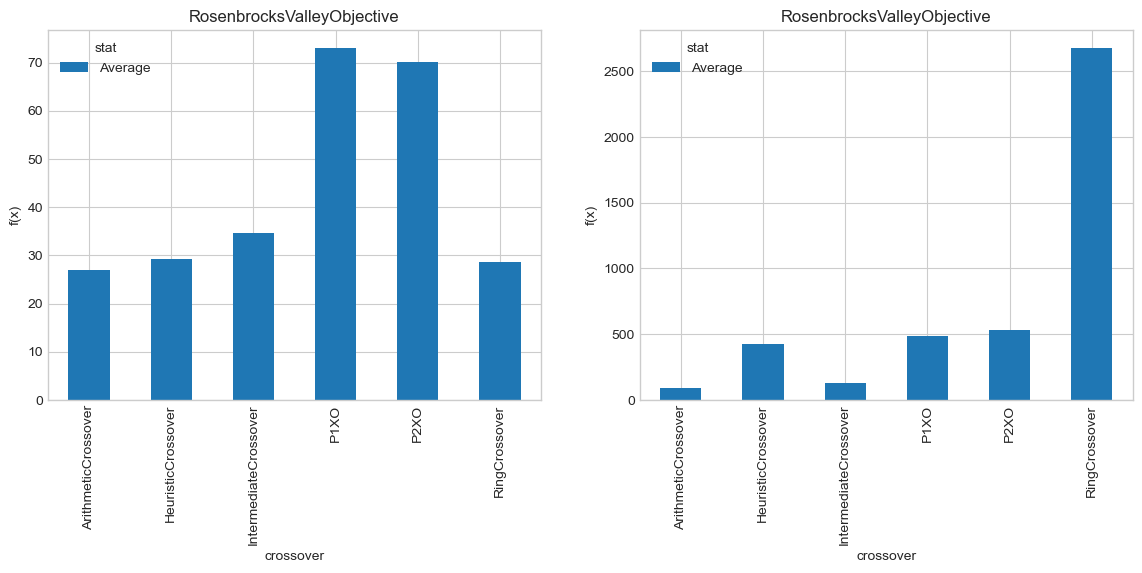

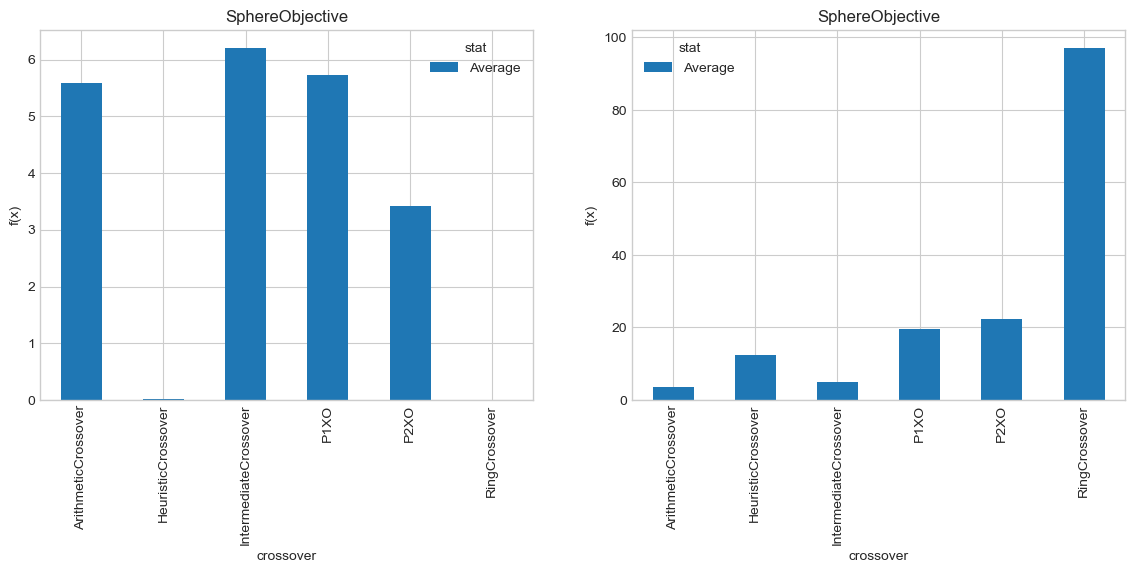

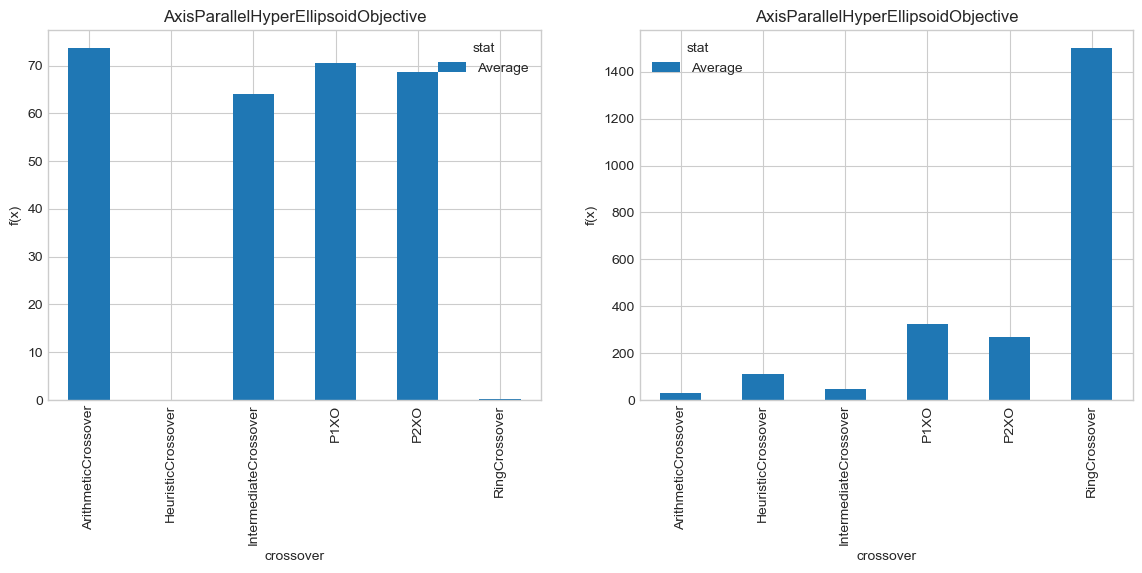

In [5]:
# folders = ["FrontRearCrossover", "HighDimensionalGeneticAlgorithmToolboxCrossover","RingCrossover", "CollectiveCrossover"]
# stats = ["mean", "max", "min", "var", "sum", "maxFitnessCount"]
target_id = 0
target = [
    {
        "folder": "RingCrossover", "stats": ["mean", "max", "min"], "wantFitness": False, 
         "oriResult": getRingCrossoverOriResult("RingCrossover"), "index": {'max':'Worst', "mean": "Average", "min": "Best"}
    },
    {
        "folder": "HighDimensionalGeneticAlgorithmToolboxCrossover", "stats": ["mean", "min", "var"], "wantFitness": False, 
        "oriResult": getHDGAOriResult("HighDimensionalGeneticAlgorithmToolboxCrossover"), 
        "index": {'mean':'Mean', "min": "Min", "var": "Variance"} },
    {
        "folder": "CollectiveCrossover", "stats": ["mean"], "wantFitness": False, 
        "oriResult": getCollectiveCrossoverOriResult("CollectiveCrossover"),  "index": {'mean':'Mean'}
    },
]

folder = target[target_id]["folder"]
stats = target[target_id]["stats"]
wantFitness = target[target_id]["wantFitness"]
oriResult = target[target_id]["oriResult"]
index = target[target_id]["index"]


def compareResultBetweenCrossover(df, crossover1, crossover2, stat):
    crossover1_win = 0
    crossover1_tie = 0
    for column in result.columns:
        if result.loc[crossover1, stat][column] < result.loc[crossover2, stat][column]:
            crossover1_win = crossover1_win + 1
        elif result.loc[crossover1, stat][column] == result.loc[crossover2, stat][column]:
            crossover1_tie = crossover1_tie + 1
            print(column)
    return crossover1_win, crossover1_tie, len(result.columns) - crossover1_win - crossover1_tie
    
# process file not have FitnessEvaluateCountReachTarget in file name
for subdir, dirs, files in os.walk(folder):
    crossovers, benchmarks = getLists(files)
    iterables = [crossovers, stats]
    result = pd.DataFrame(columns = benchmarks, index = pd.MultiIndex.from_product(iterables, names=["crossover", "stat"]))
    files = [file for file in files if 'FitnessEvaluateCountReachTarget' not in file]
    for file in files:
        crossover = file.split("+")[0]
        benchmark = file.split("+")[1].split(".")[0]
        df = pd.read_csv(folder+"/"+file, index_col=False)
        df = fixFormat(df)

        temp_result = {}
        temp_df = df.groupby("Generation")["F(x)"]
        temp_result["mean"] = temp_df.mean()[df["Generation"].max()]
        temp_result["max"] = temp_df.max()[df["Generation"].max()]
        temp_result["min"] = temp_df.min()[df["Generation"].max()]
        temp_result["var"] = temp_df.var()[df["Generation"].max()]
        temp_result["sum"] = temp_df.sum()[df["Generation"].max()]

#         if "RingCrossover" in file:
#             print(file)
#             for_graph = df.groupby(['Generation']).mean()["F(x)"]
#             plt.plot(for_graph.index, for_graph)
#             plt.show()
#                         plt.plot(for_graph.mean()["F(x)"],index, for_graph.mean()["F(x)"])
#             plt.plot(for_graph.mean()["F(x)"],index, for_graph.max()["F(x)"])
#             plt.plot(for_graph.mean()["F(x)"],index, for_graph.min()["F(x)"])
#             plt.scatter(df["Generation"], df["F(x)"])
#             plt.show()
        for stat in stats:
            if stat in temp_result.keys():
                result.loc[crossover, stat][benchmark] = temp_result[stat]

    for column in result.columns:
        fig, axes = plt.subplots(1, 2)
        # filter unrelated stat, rename to paper's stat (max -> Best...)
        a = oriResult[column][np.in1d(oriResult.index.get_level_values(1), stats)].rename(index=index, level=1)
        a = a.unstack().plot(kind='bar', title=column, ax=axes[0],figsize=(14,4.8))
        a.set_ylabel("Fitness value" if wantFitness else "f(x)")
        b = result[column].rename(index=index, level=1).unstack().plot(kind='bar', title=column, ax=axes[1])
        b.set_ylabel("Fitness value" if wantFitness else "f(x)")
        
        
        plt.savefig(column + ".jpg", bbox_inches='tight')
        
    plt.show()
    
#         win, tie, lose = compareResultBetweenCrossover(df, "CollectiveCrossover-30", "P1XO-30", "mean")
#         print(str(win) + " : " + str(tie) + " : " + str(lose))
#         win, tie, lose = compareResultBetweenCrossover(df, "CollectiveCrossover-30", "P2XO-30", "mean")
#         print(str(win) + " : " + str(tie) + " : " + str(lose))

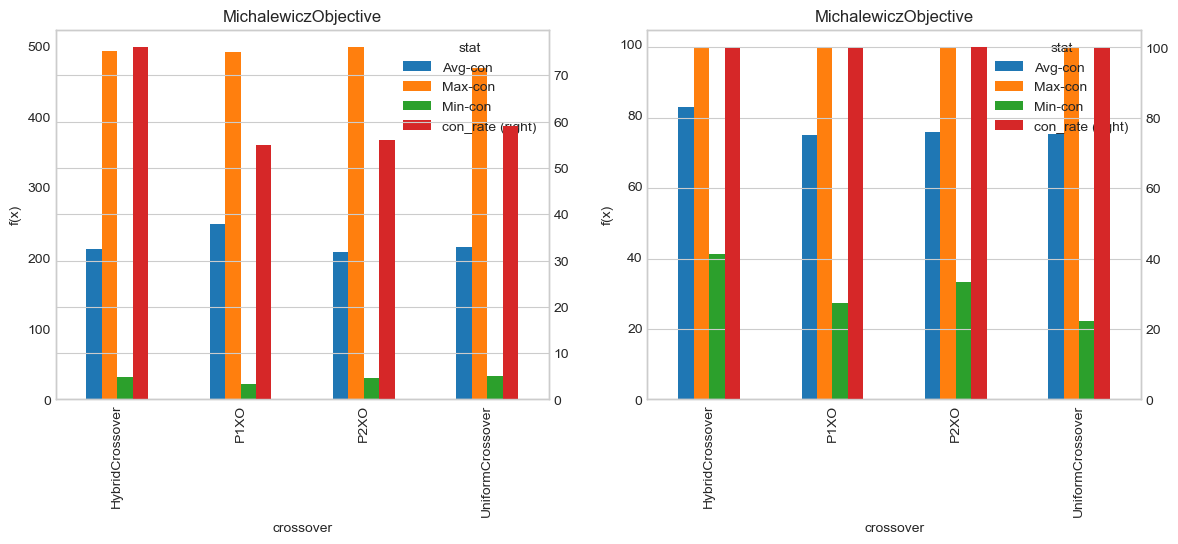

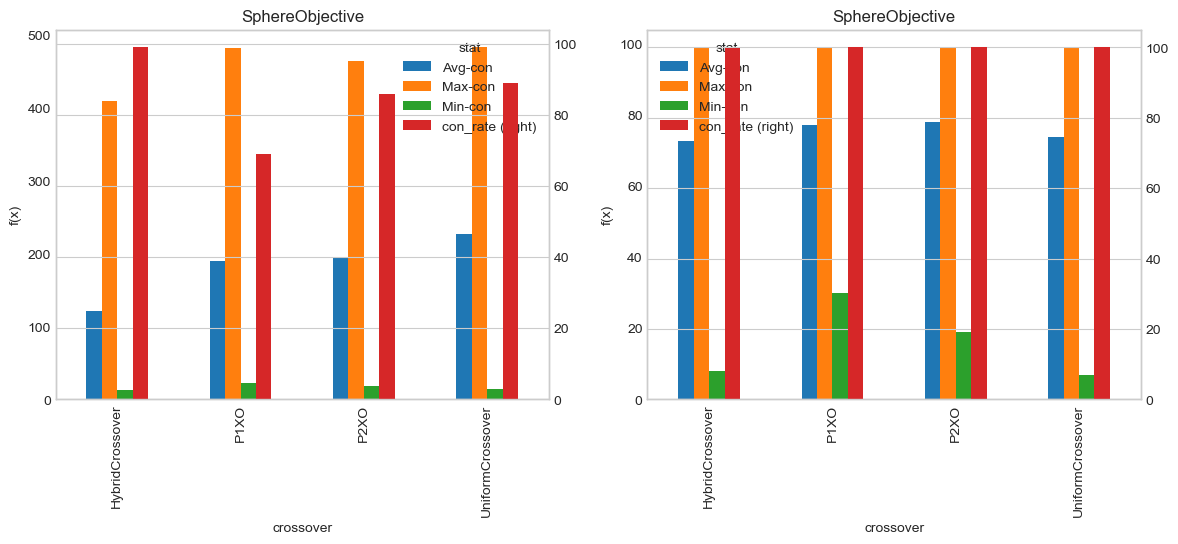

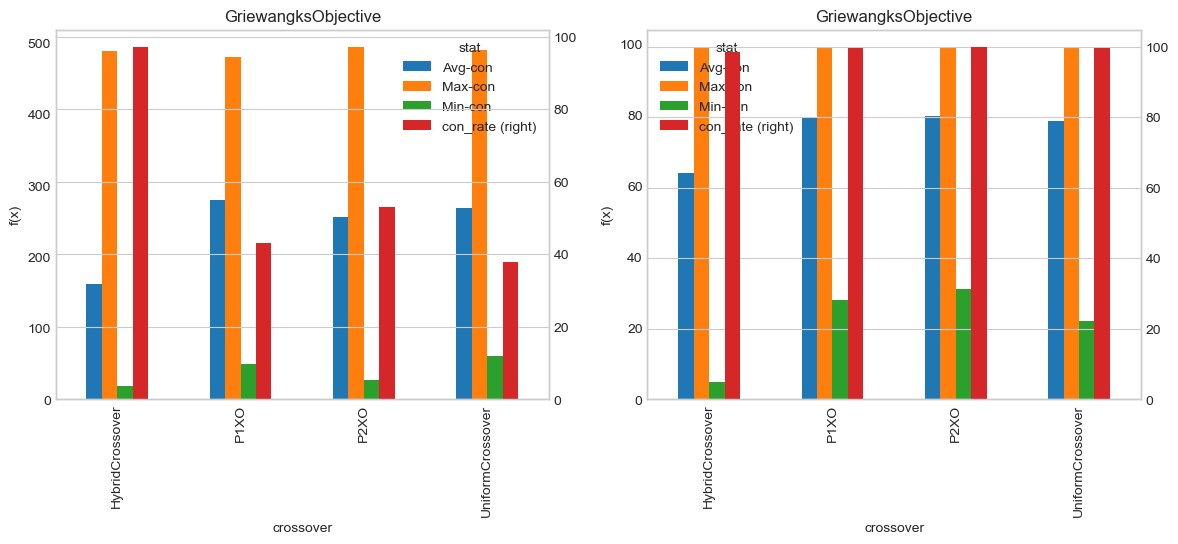

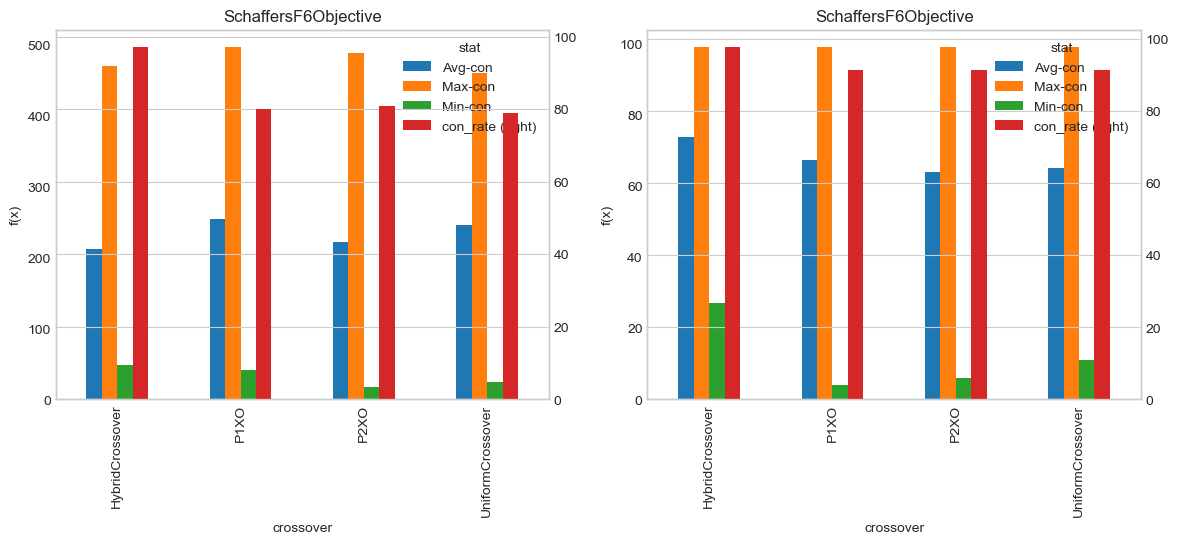

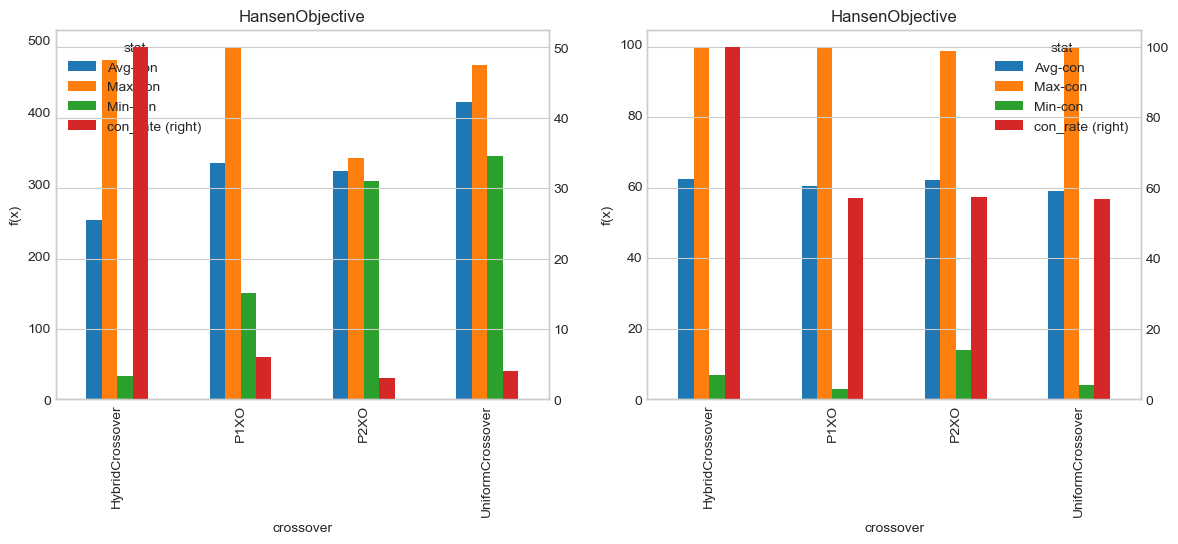

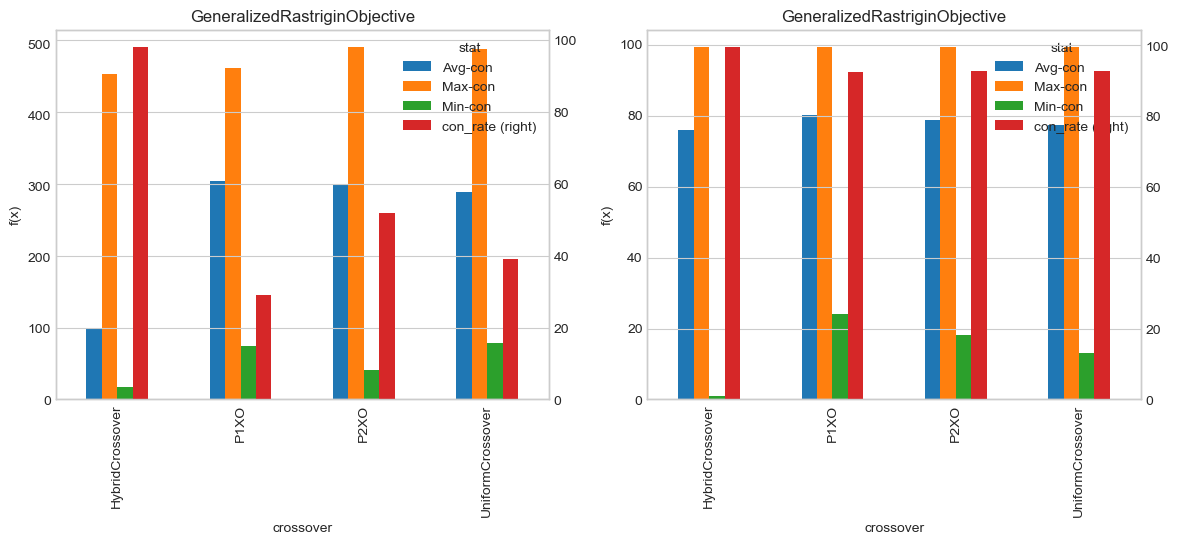

                          MichalewiczObjective SphereObjective  \
crossover        stat                                            
P2XO             mean                    75.36           78.06   
                 max                        99              99   
                 min                        33              19   
                 con_rate            99.999972           100.0   
HybridCrossover  mean                    82.21           72.77   
                 max                        99              99   
                 min                        41               8   
                 con_rate             99.94035       99.981762   
P1XO             mean                    74.45           77.14   
                 max                        99              99   
                 min                        27              30   
                 con_rate            99.940232           100.0   
UniformCrossover mean                    74.79           73.94   
          

In [27]:
# stats = ["mean", "max", "min", "var", "sum"]
# GeneticAlgorithm.genstep need be be 1
folder = "HybridCrossover"
stats = ["mean", "max", "min","con_rate"]
line_stats = ["con_rate"]
wantFitness = False
oriResult = getHybridCrossoverOriResult("HybridCrossover")
index = {"mean": "Avg-con", "max": "Max-con", "min": "Min-con"}

def round_down(value, decimals):
    with decimal.localcontext() as ctx:
        d = decimal.Decimal(value)
        ctx.rounding = decimal.ROUND_DOWN
        return round(d, decimals)
    
# calculateConvergenceGeneration, if difference smaller than 1.0e-6 then consider no different
def calculateConvergenceGeneration(df):
    result = []
#     repeats = set(df["Repeat"])
    repeats = range(100)
#     generations = sorted(set(df["Generation"]), reverse=True)
    generations = sorted(range(100), reverse=True)
#     print(repeats)
    generations.pop()
    for repeat in repeats:
        gene_count = 0
        temp = df[df["Repeat"].isin({repeat})]
        for generation in generations:
            old_fx = temp[temp["Generation"].isin({generation-1})]["F(x)"].iloc[0]
            fx = temp[temp["Generation"].isin({generation})]["F(x)"].iloc[0]
            
            if round_down(fx, 6) == round_down(old_fx, 6):
                gene_count = gene_count + 1
            else:
                break
        result.append(generations[0]-gene_count)
    return result

global_mins = {
    "SphereObjective": 0,
    "GeneralizedRastriginObjective": 0,
    "SchaffersF6Objective": 0,
    "GriewangksObjective": 0,
    "HansenObjective": -176.541793,
    "MichalewiczObjective": -1.8013,
}

# calculate absolute range between first and last generation
def calculateConvergenceRate(df, benchmark, minOf="global"):
    def get_min_max_array(array, value):
        array.append(value)
        if len(array) > 2:
            array = [np.min(array), np.max(array)]
        return array
    result = []
    repeats = set(df["Repeat"])
    min_gen = min(df["Generation"])
    max_gen = max(df["Generation"])
    min_gen_fx = []
    max_gen_fx = []
    for repeat in repeats:
        gene_count = 0
        temp = df[df["Repeat"].isin({repeat})]
        gen_min_fx = temp[temp["Generation"] == min_gen]["F(x)"].iloc[0]
        min_gen_fx = get_min_max_array(min_gen_fx, gen_min_fx)
        gen_max_fx = temp[temp["Generation"] == max_gen]["F(x)"].iloc[0]
        max_gen_fx = get_min_max_array(max_gen_fx, gen_max_fx)
    if minOf == "global":
        min_gen_fx[0] = global_mins[benchmark]
        max_gen_fx[0] = global_mins[benchmark]
    min_gen_fx = abs(min_gen_fx[1] - min_gen_fx[0])
    max_gen_fx = abs(max_gen_fx[1] - max_gen_fx[0])
    if min_gen_fx == 0:
        print(" alr done convergence in start")
        return 0
    else:
        return (1-(max_gen_fx/ min_gen_fx)) * 100
    
for subdir, dirs, files in os.walk(folder):
    crossovers, benchmarks = getLists(files)
    iterables = [crossovers, stats]
    result = pd.DataFrame(columns = benchmarks, index = pd.MultiIndex.from_product(iterables, names=["crossover", "stat"]))

    files = [file for file in files if 'FitnessEvaluateCountReachTarget' not in file]
    for file in files:
        crossover = file.split("+")[0]
        benchmark = file.split("+")[1].split(".")[0]
        df = pd.read_csv(folder+"/"+file, index_col=False)
        df = fixFormat(df)

        temp_result = {}
        convergence = calculateConvergenceGeneration(df)
        temp_result["mean"] = sum(convergence) / len(convergence)
        temp_result["max"] = np.max(convergence)
        temp_result["min"] = np.min(convergence)
        temp_result["var"] = np.var(convergence)
        temp_result["sum"] = sum(convergence)
        temp_result["con_rate"] = calculateConvergenceRate(df, benchmark, "own")
#         if "con_rate_with_own" in stats:
#             temp_result["con_rate_with_own"] = calculateConvergenceRate(df, benchmark, "own")
#         if "con_rate_with_global_min" in stats:
#             temp_result["con_rate_with_global_min"] = calculateConvergenceRate(df, benchmark, "global")

        for stat in stats:
            result.loc[crossover, stat][benchmark] = temp_result[stat]

    for column in result.columns:
        fig, axes = plt.subplots(1, 2)
#         [np.in1d(oriResult.index.get_level_values(1), stats)]
        a = oriResult[column].rename(index=index, level=1)
        a = a.unstack().plot(kind='bar', title=column, ax=axes[0],figsize=(14,4.8), secondary_y=["con_rate"])
        a.set_ylabel("Fitness value" if wantFitness else "f(x)")
        
        b = result[column].rename(index=index, level=1)
        b = b.unstack().plot(kind='bar', title=column, ax=axes[1], secondary_y=["con_rate"])
        b.set_ylabel("Fitness value" if wantFitness else "f(x)")
#         plt.savefig(column + ".jpg", bbox_inches='tight')
    plt.show()
    print(result)

C:\Users\wangl\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\__init__.py:71: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes
  plot_obj.generate()


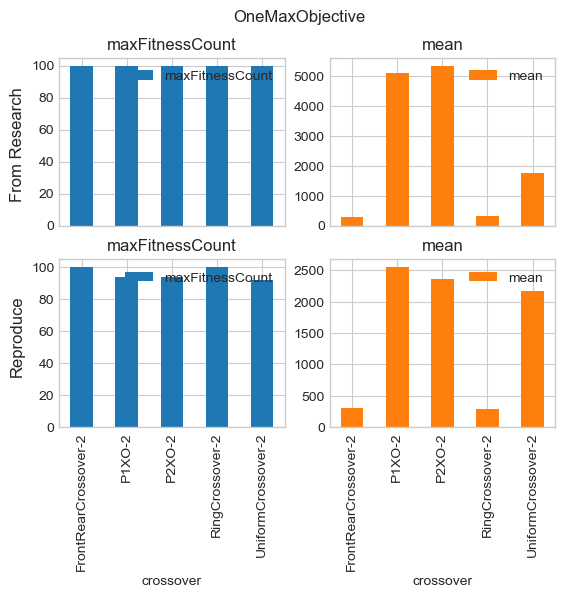

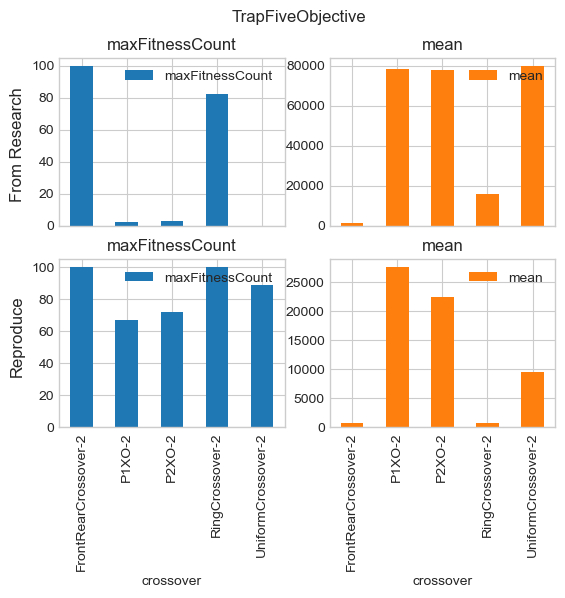

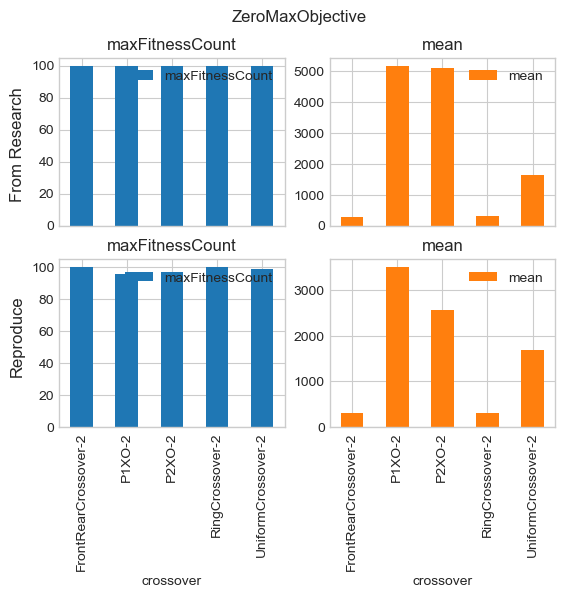

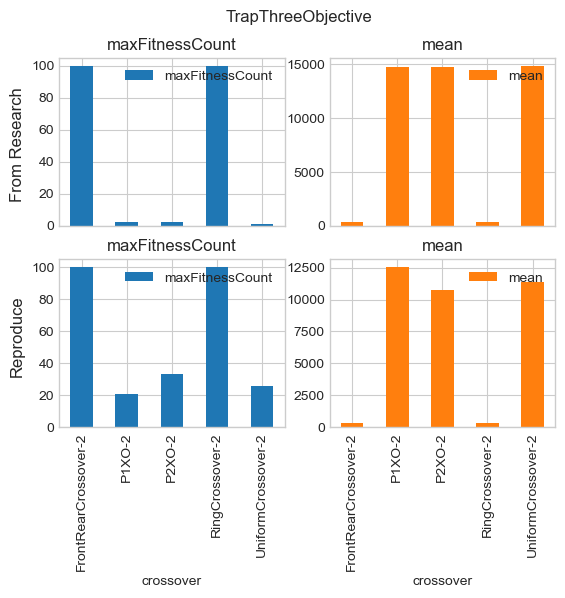

                                     OneMaxObjective TrapFiveObjective  \
crossover            stat                                                
FrontRearCrossover-4 mean                     527.24           1240.59   
                     maxFitnessCount               0                 0   
RingCrossover-2      mean                     292.92            698.81   
                     maxFitnessCount             100               100   
P1XO-8               mean                   11297.83          78173.56   
                     maxFitnessCount               0                 0   
FrontRearCrossover-2 mean                     300.99            710.93   
                     maxFitnessCount             100               100   
RingCrossover-4      mean                     506.41           1187.07   
                     maxFitnessCount               0                 0   
UniformCrossover-8   mean                    8093.41          51560.35   
                     maxFitnessCount  

In [76]:
maxFitness = 30
chromoseLength = 15
target_id = 0
target = [
    {
        "folder": "FrontRearCrossover", "stats": ["mean", "maxFitnessCount"], "wantFitness": True, 
         "oriResult": getFrontRearCrossoverOriResult("FrontRearCrossover"), "index": {}
    },
]

folder = target[target_id]["folder"]
stats = target[target_id]["stats"]
wantFitness = target[target_id]["wantFitness"]
oriResult = target[target_id]["oriResult"]
index = target[target_id]["index"]


# calculate for front-rear crossover
for subdir, dirs, files in os.walk(folder):
    crossovers, benchmarks = getLists(files)
    iterables = [crossovers, stats]
    result = pd.DataFrame(columns = benchmarks, index = pd.MultiIndex.from_product(iterables, names=["crossover", "stat"]))

    files_filtered = [file for file in files if 'FitnessEvaluateCountReachTarget' in file]
    for file in files_filtered:
        crossover = file.split("+")[0]
        benchmark = file.split("+")[1]
        df = pd.read_csv(folder+"/"+file, index_col=False)
        df = fixFormat(df)

        temp_result = {}
        temp_result["mean"] = df["FitnessEvaluateCountReachTarget"].mean()
        temp_result["max"] = df["FitnessEvaluateCountReachTarget"].max()
        temp_result["min"] = df["FitnessEvaluateCountReachTarget"].min()
        temp_result["var"] = df["FitnessEvaluateCountReachTarget"].var()
        temp_result["sum"] = df["FitnessEvaluateCountReachTarget"].sum()

        for stat in stats:
            if stat in temp_result.keys():
                result.loc[crossover, stat][benchmark] = temp_result[stat]
                
    files_filtered = [file for file in files if 'FitnessEvaluateCountReachTarget' not in file]
    for file in files_filtered:
        crossover = file.split("+")[0]
        benchmark = file.split("+")[1].split(".")[0]
        df = pd.read_csv(folder+"/"+file, index_col=False)
        df = fixFormat(df)

        temp_result = {}
        lastGenFx = df[df["Generation"] == df["Generation"].max()]["F(x)"]
        temp_result["maxFitnessCount"] = len(lastGenFx[lastGenFx == maxFitness])
        
        for stat in stats:
            if stat in temp_result.keys():
                result.loc[crossover, stat][benchmark] = temp_result[stat]
    
    filtered_row_index = [k for k in oriResult.index.get_level_values(0).tolist() if '-'+str(int(maxFitness/chromoseLength)) in k]
    for column in result.columns:
        fig, axes = plt.subplots(2, 2)
        a = oriResult[column][np.in1d(oriResult.index.get_level_values(1), stats)]
        a = a[np.in1d(a.index.get_level_values(0), filtered_row_index)].rename(index=index, level=1)
        a = a.unstack().plot(kind='bar', subplots=True,sharex=True, title=column, ax=axes[0], figsize=(12,4.8))
        
        b = result[column][np.in1d(result.index.get_level_values(0), filtered_row_index)].rename(index=index, level=1)
        b = b.unstack().plot(kind='bar', subplots=True,sharex=True,title=column, ax=axes[1])
        
        plt.figtext(0.06, 0.7, "From Research", fontsize=12, rotation=90, ha='center', va='center')
        plt.figtext(0.06, 0.3, "Reproduce", fontsize=12, rotation=90, ha='center', va='center')
#         plt.savefig(column + "-" + str(maxFitness) + ".jpg", bbox_inches='tight')
    
    plt.show()
    print(result)

In [3]:
def getRingCrossoverOriResult(folder):
    for subdir, dirs, files in os.walk(folder):
        crossovers, benchmarks = getLists(files)
        iterables = [
            ["P1XO", "P2XO", "IntermediateCrossover", "HeuristicCrossover", "ArithmeticCrossover", "RingCrossover",], 
            ["mean", "max", "min"]
        ]
        result = pd.DataFrame(columns = benchmarks, index = pd.MultiIndex.from_product(iterables, names=["crossover", "stat"]))
        result["RosenbrocksValleyObjective"] = [
            73.07,269.3,73.08,
            70.07, 390.3, 78.39,
            34.71, 349.2, 34.74,
            29.35, 369.1, 117.5,
            27.08, 260.3, 27.12,
            28.59, 316.1, 32.69,
        ]
        result["AxisParallelHyperEllipsoidObjective"] = [
            70.52, 105.7, 70.52,
            68.63, 94.04, 68.64,
            64.04, 80.4, 64.04,
            0.024, 87.41, 5.706,
            73.71, 89.18, 73.72,
            0.1023, 106.8, 11.73,
        ]
        result["SphereObjective"] = [
            5.732, 7.246, 5.737,
            3.416, 6.511, 3.417,
            6.207, 6.246, 6.208,
            0.011, 8.099, 2.81,
            5.589, 6.389, 5.589,
            0.0027, 6.163, 0.3299
        ]
        result["NormalizedSchwefelObjective"] = [
            -115.7, -29.46, -115.6,
            -115.8, -26.85, -115.4,
            -114.1, -27.91, -114,
            -117.7, -26.1, -117.1,
            -113.2, -27.72, -113.1,
            -117.8, -27.75, -117.7,
        ]
        result["RotatedHyperEllipsoidObjective"] = [
            20.79, 261.7, 37.02,
            15.06, 204.8, 16.22,
            22.86, 59.24, 22.87,
            2.36, 381, 17.58,
            24.37, 47.94, 24.37,
            4.577, 108.2, 18.97,
        ]
        result["GeneralizedRastriginObjective"] = [
            94.69, 241.3, 111.3,
            50.84, 257.7, 52.15,
            122.6, 256.6, 187.3,
            12.68, 173.1, 31.98,
            154, 251.4, 154.1,
            2.669, 232.5, 3.691,
        ]
        return result
    
def getHDGAOriResult(folder):
    for subdir, dirs, files in os.walk(folder):
        crossovers, benchmarks = getLists(files)
        iterables = [
            ["P1XO", "HighDimensionalGeneticAlgorithmToolboxCrossover"], 
            ["min", "mean", "var"]
        ]
        result = pd.DataFrame(columns = benchmarks, index = pd.MultiIndex.from_product(iterables, names=["crossover", "stat"]))
        result["ZakharovObjective"] = [
            8.7426, 40.8791, 297.49,
            2.2244, 13.5011, 56.7825,
        ]
        result["DixonPriceObjective"] = [
            2.4271, 58.9734, 9067.1742,
            0.5538, 6.0133, 120.6263,
        ]
        result["SphereObjective"] = [
            0.055081, 0.2988, 0.066168,
            0.00027559, 0.0071927, 0.00015764,
        ]
        result["ShubertObjective"] = [
            -186.7309, -185.9764, 40.9808,
            -186.7309, -185.9068, 23.069,
        ]
        return result
    
def getCollectiveCrossoverOriResult(folder):
    for subdir, dirs, files in os.walk(folder):
        crossovers, benchmarks = getLists(files)
        iterables = [
            ["CollectiveCrossover-30", "P1XO-30", "P2XO-30", "CollectiveCrossover-50", "P1XO-50", "P2XO-50"], 
            ["mean"]
        ]
        result = pd.DataFrame(columns = benchmarks, index = pd.MultiIndex.from_product(iterables, names=["crossover", "stat"]))
        result["ShiftedandRotatedLunacekBi_RastriginObjective"] = [
            5.75E+07, 1.15E+08, 9.65E+07, 1.76E+08, 3.41E+08, 3.00E+08
        ]
        result["ShiftedandRotatedBentCigarObjective"] = [
            3.79E+13, 4.12E+13, 4.05E+13, 3.61E+14, 4.23E+14, 4.12E+14
        ]
        result["ShiftedandRotatedRastriginObjective"] = [
            2.35E+06, 2.23E+06, 2.43E+06, 5.43E+06, 7.59E+06, 6.66E+06
        ]
        result["ShiftedandRotatedSchwefelObjective"] = [
            1.82E+08, 2.41E+08, 2.34E+08, 5.37E+08, 6.10E+08, 6.56E+08
        ]
        
        result["ShiftedandRotatedRosenbrockObjective"] = [
            6.61E+07, 1.19E+08, 9.90E+07, 2.07E+08, 3.48E+08, 3.32E+08
        ]
        result["ShiftedandRotatedLevyObjective"] = [
            2.91E+09, 3.45E+09, 3.15E+09, 7.06E+09, 7.59E+09, 7.48E+09
        ]
        result["ShiftedandRotatedZakharovObjective"] = [
            1.15E+08, 1.27E+08, 1.31E+08, 2.44E+08, 3.28E+08, 3.02E+08
        ]
        return result
    
def getHybridCrossoverOriResult(folder):
    for subdir, dirs, files in os.walk(folder):
        crossovers, benchmarks = getLists(files)
        iterables = [
            ["P1XO", "P2XO", "UniformCrossover", "HybridCrossover"], 
            ["mean", "max", "min", "con_rate"]
        ]
        result = pd.DataFrame(columns = benchmarks, index = pd.MultiIndex.from_product(iterables, names=["crossover", "stat"]))
        result["SchaffersF6Objective"] = [
            255, 497, 41, 80,
            222, 489, 18, 81,
            247, 461, 25, 79,
            213, 471, 48, 97,
        ]
        result["HansenObjective"] = [
            328, 489, 148, 6,
            317, 335, 304, 3,
            413, 464, 338, 4,
            249, 471, 33, 50,
        ]
        result["GeneralizedRastriginObjective"] = [
            307, 466, 75, 29,
            303, 495, 41, 52,
            292, 493, 79, 39,
            99, 457, 18, 98,
        ]
        result["GriewangksObjective"] = [
            280, 481, 50, 43,
            256, 494, 27, 53,
            269, 491, 61, 38,
            162, 489, 19, 97,
        ]
        result["MichalewiczObjective"] = [
            248, 492, 22, 55,
            209, 498, 31, 56,
            215, 469, 33, 59,
            213, 493, 32, 76,
        ]
        result["SphereObjective"] = [
            190, 482, 23, 69,
            194, 464, 18, 86,
            227, 483, 15, 89,
            121, 409, 13, 99,
        ]
        return result
    
def getFrontRearCrossoverOriResult(folder):
    for subdir, dirs, files in os.walk(folder):
        crossovers, benchmarks = getLists(files)
        iterables = [
            [
                'P1XO-2', 'P2XO-2', 'UniformCrossover-2', 'RingCrossover-2', 'FrontRearCrossover-2', 
                'P1XO-4', 'P2XO-4', 'UniformCrossover-4', 'RingCrossover-4', 'FrontRearCrossover-4', 
                'P1XO-8', 'P2XO-8', 'UniformCrossover-8', 'RingCrossover-8', 'FrontRearCrossover-8', 
            ], 
            ["mean", "maxFitnessCount"]
        ]
        result = pd.DataFrame(columns = benchmarks, index = pd.MultiIndex.from_product(iterables, names=["crossover", "stat"]))
        result["OneMaxObjective"] = [
            5106.3, 100,
            5353.5, 100,
            1774.2, 100,
            319.2, 100,
            298.8, 100,
            
            13778.4, 39,
            13788.3, 37,
            10364.4, 67,
            553.8, 100,
            504.6, 100,

            15000, 0,
            15000, 0,
            14984.4, 2,
            878.4, 100,
            835.5, 100,
        ]
        result["TrapThreeObjective"] = [
            14726.4, 2,
            14751, 2,
            14852.7, 1,
            378, 100,
            348.9, 100,

            15000, 0,
            15000, 0,
            15000, 0,
            746.7, 100,
            716.7, 100,

            15000, 0,
            15000, 0,
            15000, 0,
            1412.1, 100,
            1314.3, 100,
        ]
        result["TrapFiveObjective"] = [
            78415.2, 2,
            77626.4, 3,
            80000, 0,
            15968.8, 82,
            1078.4, 100,

            80000, 0,
            80000, 0,
            80000, 0,
            31635.2, 63,
            2058.4, 100,

            80000, 0,
            80000, 0,
            80000, 0,
            35763.2, 58,
            3648, 100,
        ]
        result["ZeroMaxObjective"] = [
            5185.8, 100, 
            5100, 100, 
            1631.4, 100, 
            310.8, 100, 
            293.7, 100, 

            13781.4, 39, 
            13540.8, 39, 
            10086.6, 69, 
            536.4, 100, 
            506.1, 100, 

            15000, 0, 
            15000, 0, 
            14993.7, 1, 
            890.4, 100, 
            838.8, 100, 
        ]
        return result
# getRingCrossoverOriResult("RingCrossover")
# getHDGAOriResult("HighDimensionalGeneticAlgorithmToolboxCrossover")
# getCollectiveCrossoverOriResult("CollectiveCrossover")
# getHybridCrossoverOriResult("HybridCrossover")
# getFrontRearCrossoverOriResult("FrontRearCrossover")